# Polynomial Regression
In this exercise, we will use polynomial regression model to estimate the relationship between the career level and the salary. Our optimized polynomial regression model can accurately predict one's salary, given a career level.

In [12]:
def evaluate_model(y_test, y_pred):
  test_r2 = r2_score(y_test, y_pred)
  test_mae = mean_absolute_error(y_test, y_pred)
  test_mse = mean_squared_error(y_test, y_pred)
  test_rmse = np.sqrt(test_mse)

  print("R2: {}".format(test_r2))
  print("MAE: {}".format(test_mae))
  print("MSE: {}".format(test_mse))

  print("RMSE: {}".format(test_rmse))

## Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Reading the dataset

In [3]:
dataset = pd.read_csv('position_salaries.csv')

print(dataset.head())

# double bracket creates a DF, single is an array
X = dataset[['Level']]
y = dataset[['Salary']]

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

 ## Inspecting the intercept (constant) and the coefficient (slope)



In [6]:
intercept = regressor.intercept_
print("Intercept: {}".format(intercept))

coefficient = regressor.coef_
print("coefficient: {}".format(coefficient))

Intercept: [-205322.8962818]
coefficient: [[83199.60861057]]


## Predicting the Test set results

In [7]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

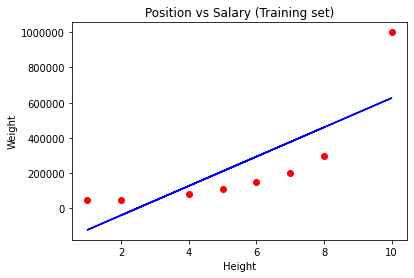

In [8]:
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Position vs Salary (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## Visualising the Test set results



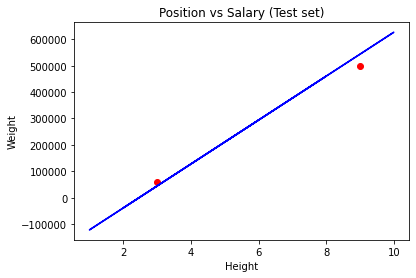

In [9]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Position vs Salary (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## Evaluating the model with R2, MAE, MSE and RMSE

In [13]:
evaluate_model(y_test, y_pred)

R2: 0.9779215014976274
MAE: 29598.82583170262
MSE: 1068599327.5148352
RMSE: 32689.43755274531


## Test with new data points

In [15]:
test_df = pd.DataFrame(data={'Level': [1, 4, 10, 8]})

levels_predictions = regressor.predict(test_df)
print(levels_predictions)

[[-122123.28767123]
 [ 127475.53816047]
 [ 626673.18982387]
 [ 460273.97260274]]


## Training the Simple Linear Regression model on the extended data with Polynomial Features

In [36]:
from sklearn.preprocessing import PolynomialFeatures

degree = 5
poly_feat = PolynomialFeatures(degree=degree)

X_poly = poly_feat.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

## Evaluating the model with R2, MAE, MSE and RMSE

In [29]:
X_test_poly = poly_feat.fit_transform(X_test)
y_pred = pol_reg.predict(X_test_poly)
evaluate_model(y_test, y_pred)

R2: 0.9836003615817076
MAE: 21875.000003548805
MSE: 793742499.4453505
RMSE: 28173.436060327298


## Visualising the Training set results

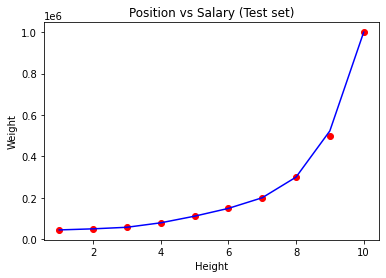

In [37]:
plt.scatter(X, y, color = 'red')
plt.plot(X, pol_reg.predict(poly_feat.fit_transform(X)), color = 'blue')
plt.title('Position vs Salary (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## Find the best degree with GridSearchCV

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

degrees = range(2, 9)

polynomial_features = PolynomialFeatures(include_bias="False")
linear_regression = LinearRegression()

pipeline = Pipeline(steps=
        [
            ("poly", polynomial_features),
            ("model", linear_regression),
        ]
)

grid_parameters = {"poly__degree": list(degrees)}

grid_search = GridSearchCV(estimator=pipeline, param_grid=grid_parameters, scoring='explained_variance')
grid_search.fit(X_train, y_train)


best_poly_reg = grid_search.best_estimator_

print(best_poly_reg)


Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias='False')),
                ('model', LinearRegression())])


## Test with new data points

In [43]:
test_df = pd.DataFrame(data={'Level': [1, 4, 10, 8]})

levels_predictions = best_poly_reg.predict(test_df)
print(levels_predictions)

[[ 44953.88376125]
 [ 79291.2084416 ]
 [999995.08787064]
 [299982.95201727]]
